<a href="https://colab.research.google.com/github/AlvinaAnoop/SCT_ML_4/blob/main/SCT_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from google.colab import drive

In [3]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_dir = '/content/drive/MyDrive/leapGestRecog'

In [7]:
# Define the classes and image dimensions
gestures = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
img_size = 50

In [8]:
# Load the dataset
data = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)

    # Skip non-directory files like '.DS_Store'
    if not os.path.isdir(folder_path):
        continue

    for gesture in gestures:
        label = gestures.index(gesture)
        gesture_path = os.path.join(folder_path, gesture)

        # Skip non-existing gesture directories
        if not os.path.exists(gesture_path):
            continue

        for img_file in os.listdir(gesture_path):
            try:
                img = cv2.imread(os.path.join(gesture_path, img_file), cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img, (img_size, img_size))
                data.append([resized_img, label])
            except Exception as e:
                continue

In [9]:
# Shuffle data and separate features and labels
random.shuffle(data)
X = [i[0] for i in data]
y = [i[1] for i in data]

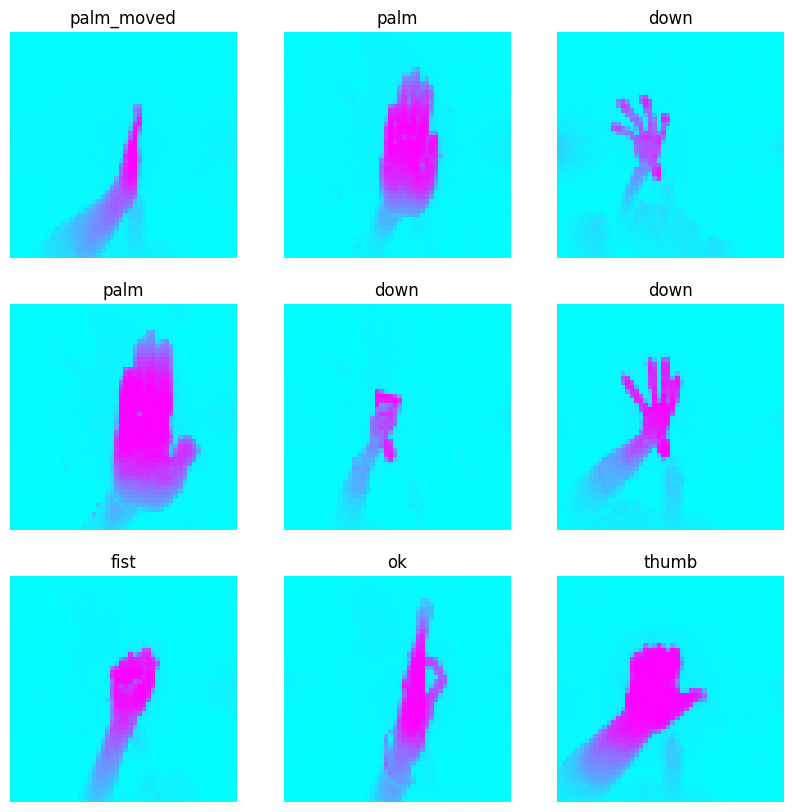

In [10]:
# Visualize a few example gestures from the dataset
plt.figure(figsize=(10,10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(data[i][0], cmap='cool')
    plt.title(gestures[y[i]][3:])  # Simplify gesture name display
    plt.axis('off')
plt.show()

In [11]:
# Normalize and reshape the data
X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0
y = keras.utils.to_categorical(y, num_classes=10)

In [12]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
# Build the CNN model
model = Sequential()

In [14]:
# First convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [15]:
# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [16]:
# Flatten the results and feed into dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout to prevent overfitting
model.add(Dense(10, activation='softmax'))

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 295ms/step - accuracy: 0.6111 - loss: 1.0973 - val_accuracy: 0.9924 - val_loss: 0.0318
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 276ms/step - accuracy: 0.9694 - loss: 0.0846 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 275ms/step - accuracy: 0.9826 - loss: 0.0494 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 154s 301ms/step - accuracy: 0.9914 - loss: 0.0303 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 126s 266ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9996 - val_loss: 0.0024
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 277ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9994 - val_loss: 0.0015
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 270ms/step - accuracy: 0.9946 - loss: 0.0191 - val_accuracy: 0.9996 - val_loss: 0.0011
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 276ms/step - accuracy: 0.9938 -

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9996 - loss: 0.0019
Test Accuracy: 99.96%


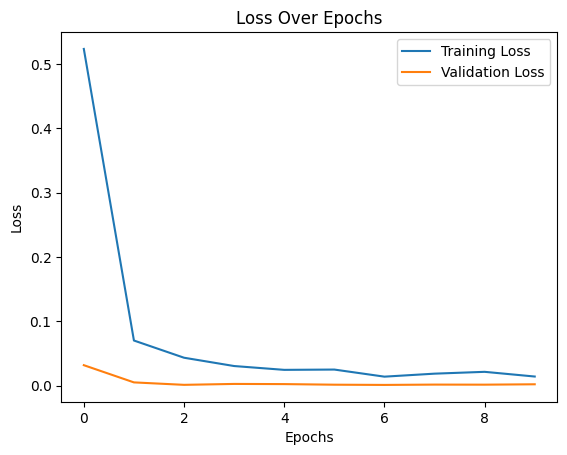

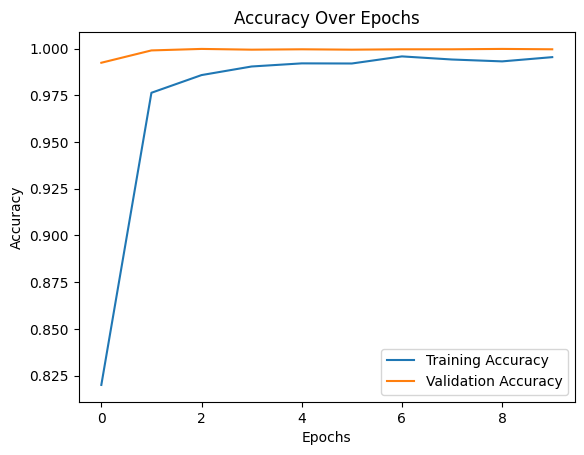

In [20]:
# Plot loss and accuracy across epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Make predictions and generate the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step


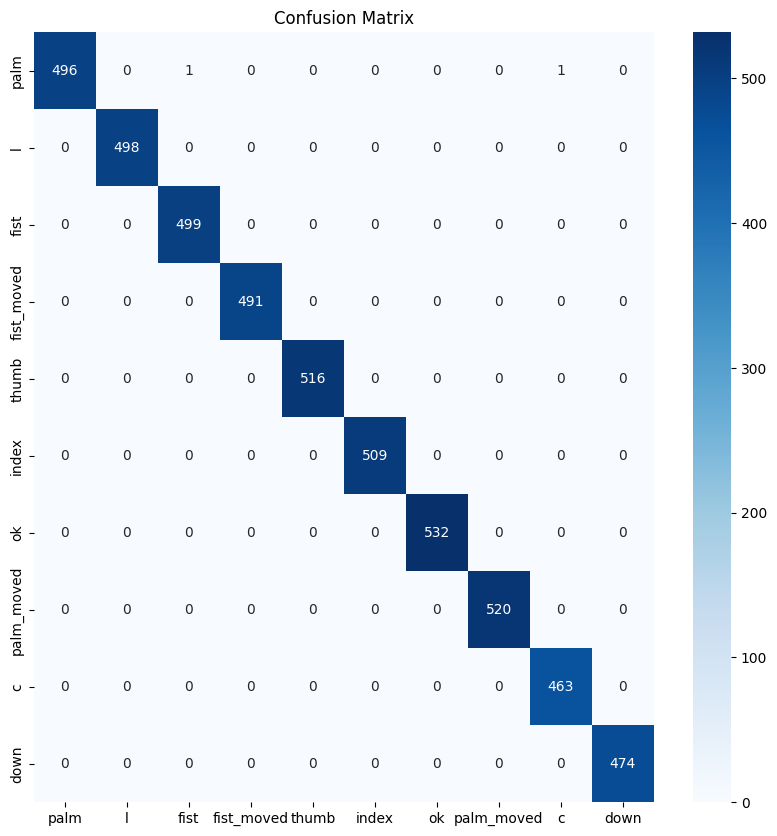

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, xticklabels=[g[3:] for g in gestures], yticklabels=[g[3:] for g in gestures], cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()